# Building a Image classifier using sequential API

# import require module and check the existance of data

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.10.0'

In [4]:
keras.__version__

'2.10.0'

In [6]:
import pandas as pd

In [7]:
dir

<function dir>

In [8]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is 381D-D187

 Directory of D:\Github\100-Days-ofML-and-DL

04/17/2024  11:13 AM    <DIR>          .
04/17/2024  08:17 AM    <DIR>          ..
04/17/2024  11:13 AM    <DIR>          .ipynb_checkpoints
04/17/2024  11:13 AM            20,244 Day1_Perceptron.ipynb
04/17/2024  08:57 AM           200,020 Day2_Sequential_API.ipynb
04/17/2024  11:11 AM                66 README.md
               3 File(s)        220,330 bytes
               3 Dir(s)  94,758,543,360 bytes free


In [9]:
import os

In [10]:
os.getcwd()

'D:\\Github\\100-Days-ofML-and-DL'

# Loading the Datasets

In [11]:
train_df=pd.read_csv(r'D:/Github/fashion_mnist/fashion-mnist_train.csv')

In [12]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_df=pd.read_csv(r'D:/Github/fashion_mnist/fashion-mnist_test.csv')

In [14]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train_data = train_df.values.astype('uint8')
Y_train=train_data[:,0]
X_train=train_data[:,1:]
test_data = test_df.values.astype('uint8')
Y_test=test_data[:,0]
X_test=test_data[:,1:]

In [16]:
X_train.shape

(60000, 784)

In [17]:
import numpy as np
x_train = np.reshape(X_train,(-1,28,28))/255
x_test = np.reshape(X_test,(-1,28,28))/255

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train.dtype

dtype('float64')

In [20]:
x_valid,x_train=x_train[:5000],x_train[5000:]

In [21]:
y_valid,y_train=Y_train[:5000],Y_train[5000:]

In [22]:
class_name=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","sneaker","Bag","Ankle boot"]

In [23]:
class_name[y_train[12]]

'Shirt'

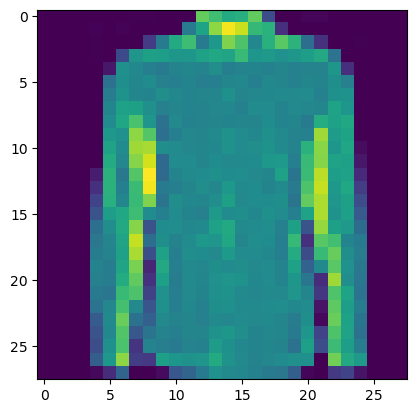

In [24]:
from matplotlib import pyplot as plt
plt.imshow(x_train[12], interpolation='nearest')
plt.show()

# Model Building

In [25]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.layers

# Compiling the Model

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

# Training and Evaluation the Module

In [29]:
history=model.fit(x_train,y_train, epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7322 - accuracy: 0.7589 - val_loss: 0.5392 - val_accuracy: 0.8166
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4899 - accuracy: 0.8285 - val_loss: 0.4690 - val_accuracy: 0.8388
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4451 - accuracy: 0.8434 - val_loss: 0.4462 - val_accuracy: 0.8454
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4186 - accuracy: 0.8532 - val_loss: 0.4545 - val_accuracy: 0.8358
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3994 - accuracy: 0.8579 - val_loss: 0.3907 - val_accuracy: 0.8648
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3842 - accuracy: 0.8643 - val_loss: 0.3813 - val_accuracy: 0.8678
Epoch 7/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3709 - accuracy: 0.8685 - val_loss: 0.4090 - val_accuracy:

# Learning Curve

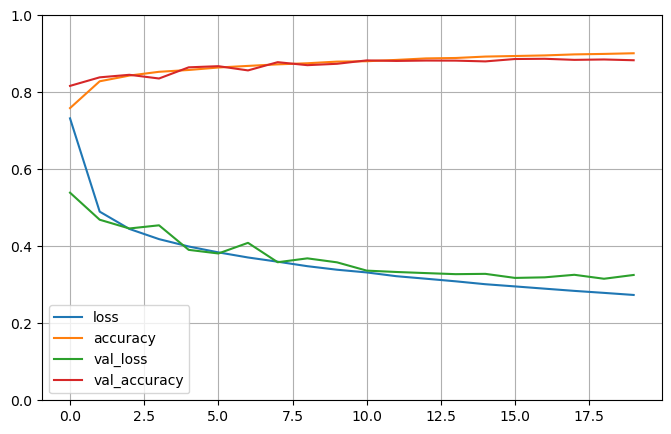

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)#set the vertical range to [0,1]
plt.show()

# Model evaluation

In [33]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8796


[0.3292882442474365, 0.8795999884605408]


# Using the model to make predictions

In [34]:
x_new=x_test[:3]

In [35]:
y_proba=model.predict(x_new)

1/1 [==============================] - 0s 130ms/step


In [37]:
y_proba.round(2)

array([[0.73, 0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.63, 0.  , 0.01, 0.  , 0.33, 0.  , 0.  , 0.  ]],
      dtype=float32)

if we only care about the highest probablity class

In [40]:
classes_x=np.argmax(y_proba,axis=1)

In [41]:
classes_x

array([0, 1, 2], dtype=int64)

In [43]:
np.array(class_name)[classes_x]

array(['T-shirt/Top', 'Trouser', 'Pullover'], dtype='<U11')

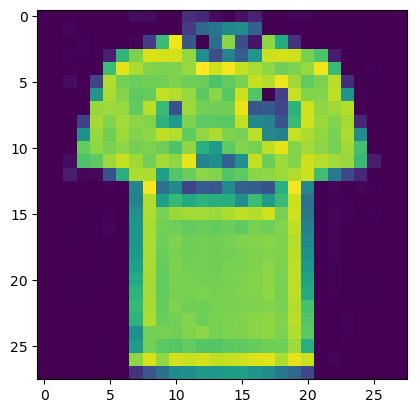

In [46]:
plt.imshow(x_new[0], interpolation='nearest')
plt.show()

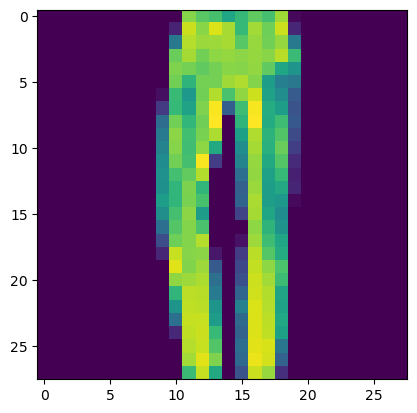

In [47]:
plt.imshow(x_new[1], interpolation='nearest')
plt.show()

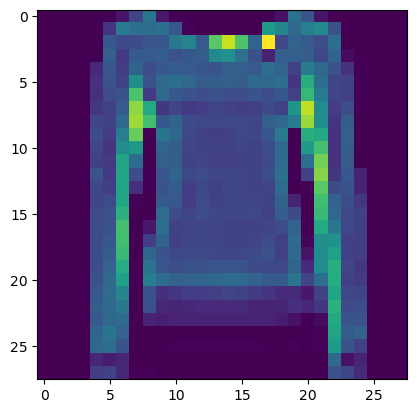

In [48]:
plt.imshow(x_new[2], interpolation='nearest')
plt.show()